# Linear Regression

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [13]:
# Create a dataset
x = np.array([10,20,30,40,50,60,70,80,90,100]).reshape(-1,1)
y = np.array([6,28,31,42,49,55,64,77,82,91])



In [14]:
model = LinearRegression().fit(x,y)

Step 4: Get the results

In [15]:
r_sq = model.score(x,y)
print(f"coefficint of determination: {r_sq}")

coefficint of determination: 0.9827364269392692


In [18]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 4.333333333333336
slope: [0.87575758]


Step 5: Predict response

In [20]:
y_pred = model.predict(x)
print(f"predicted response: {y_pred}")

predicted response: [13.09090909 21.84848485 30.60606061 39.36363636 48.12121212 56.87878788
 65.63636364 74.39393939 83.15151515 91.90909091]


Step 6: Plot

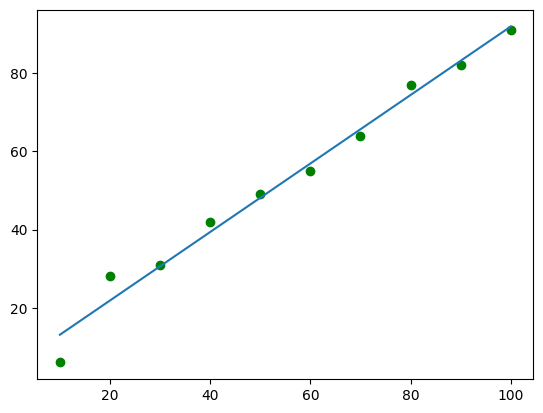

In [25]:
plt.scatter(x,y, color='green')
plt.plot(x,y_pred)

## Multiple Linear Regression 

In [27]:
x1 = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y1 = [4, 5, 20, 14, 32, 22, 38, 43]

x1, y1 = np.array(x), np.array(y)

In [29]:
model1= LinearRegression().fit(x1,y1)

In [33]:
r_sq1 = model1.score(x1,y1)
print(f"coefficint of determination: {r_sq1}")
print(f"intercept: {model1.intercept_}")
print(f"slope: {model1.coef_}")


coefficint of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [35]:
y1_pred = model1.predict(x1)
print(f"predicted response: {y1_pred}")

predicted response: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


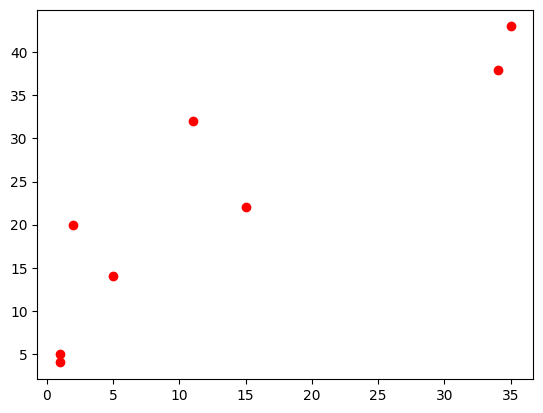

In [41]:
plt.scatter(x1[:, 1],y1, color='red')

## Linear Regression - OLS estimator

In [72]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [84]:
np.random.seed(123) # we generate random variables
beta_true = np.array([3, -4.5]) # we set the true beta values
n = np.array([10, 10, 200]) # we set means for X values
V = np.array([0.16, 1, 1]) # we set the variance of shocks 

We define function OLS estimator

In [86]:
def ols(X,y):
    XT = np.transpose(X) # X'
    XTX = np.dot(XT,X) # X'X
    
    XTX_inv = np.linalg.inv(XTX) # (X'X)^-1
    XTy = np.dot(XT,y) # X'y
    
    beta_hat = np.dot(XTX_inv, XTy) # OLS solution
    return beta_hat

We simulate and plot the regression

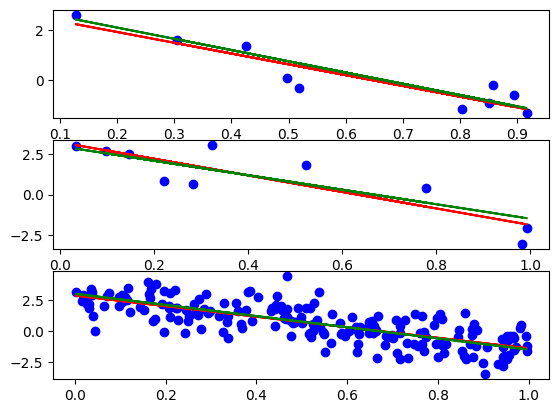

In [87]:
def simulate_and_plot(n, V, beta_true, subplot):
    x = np.random.uniform(size=n) # we generate random variables
    e = np.random.normal(scale=np.sqrt(V), size=n) #shocks are random normal numbers
    
    y = beta_true[0] + beta_true[1]*x + e # we generate y values
    X = np.column_stack((np.ones(n), x)) # transform 1-D arrays into nX2 arrays
    beta_hat = ols(X, y) # we add OLS estimator
    
    # Plotting the generated data
    subplot.scatter(x, y, c='blue')
    
    # Plotting the line based on the OLS estimates
    subplot.plot(x, beta_hat[0] + beta_hat[1]*x, c='red')
    
    # Plotting the line based on the true beta values
    subplot.plot(x, beta_true[0] + beta_true[1]*x, c='green')

fig, axs = plt.subplots(3) #number of subplots

simulate_and_plot(n[0], V[0], beta_true, axs[0])# we simulate and plot the data
simulate_and_plot(n[1], V[1], beta_true, axs[1])# we simulate and plot the data
simulate_and_plot(n[2], V[2], beta_true, axs[2])# we simulate and plot the data